This notebook shows how to reproduce the **main** results of the project in a compact way. A lot of the scripts are very resource intensive and it is adviced that you run them on a HPC setup. 

The notebook is divided into 3 parts:

0. Prerequisites
1. Data preprocessing
2. Training
3. Plot results

# 1. Prerequisites

First, install the requirements and download the data. Links to the data are provided in the README.md file.

In [ ]:
# Upgrade pip
!python -m pip install --upgrade pip
# Install dependencies
!pip install -r requirements.txt

# 2. Data preprocessing

In [ ]:
# Import functions for preprocessing
from utils.preprocessing.preprocess_rep_liver import preprocess as preprocess_liver
from utils.preprocessing.preprocess_rep_tramadol import preprocess as preprocess_tramadol
from utils.preprocessing.preprocess_tramadol_corrected import preprocess as preprocess_tramadol_corrected

In [ ]:
# Update the following dictionaries with the correct paths. These
CFG_liverfailure = {'dataset_dir': 'data/LiverFailure/',
        'dataset_name': 'dataset.csv',
        'out_dir': 'data/LiverFailure/preprocessed/'}

CFG_tramadol = {'dataset_dir': 'data/Tramadol/',
        'dataset_name': 'dataset.csv',
        'out_dir': 'data/Tramadol/preprocessed/'}

CFG_tramadol_corrected = {'dataset_dir': 'data/Tramadol_corrected/',
        'dataset_name': 'dataset.csv',
        'out_dir': 'data/Tramadol_corrected/preprocessed/'}


# Run preprocessing for all datasets
preprocess_liver(CFG_liverfailure['dataset_dir'], CFG_liverfailure['dataset_name'], CFG_liverfailure['out_dir'])
preprocess_tramadol(CFG_tramadol['dataset_dir'], CFG_tramadol['dataset_name'], CFG_tramadol['out_dir'])
preprocess_tramadol_corrected(CFG_tramadol_corrected['dataset_dir'], CFG_tramadol_corrected['dataset_name'], CFG_tramadol_corrected['out_dir'])

# 2. Training

First, train the analgesic-induced liverfailure model and run the "do-calculus" algorithm to find root causes.

In [ ]:
!python main.py --causal_predictions --causal_inference --train --config "configs\liverfailure_config.yaml"

The tramadol-related mortalities can be trained with

In [ ]:
!python main.py --causal_predictions --causal_inference --train --config "configs\\tramadol_config.yaml"

Traing model on the corrected tramadol-related mortalities data

In [ ]:
!python main.py --causal_predictions --causal_inference --train --config "configs\\tramadol_corrected_config.yaml"

**Note**: The config can be updated to run different experiments with different hyperparameters. To run training using focal loss, set the 'use_focal_loss' parameter under 'model' to True. To see the calibration results, run the create_calibration_plots method from the CalibrationAnalyser class. Remember to specify the model paths for the models which you wish to test calibration.

# 3. Plot results 

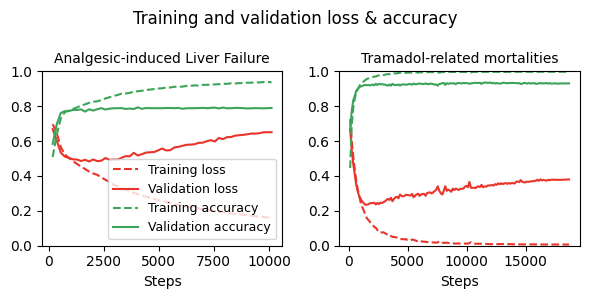

In [21]:
from plots import plot_side_by_side
from utils.misc import load_config

CFG_liverfailure = load_config('configs/liverfailure_config.yaml')
CFG_tramadol = load_config('configs/tramadol_config.yaml')

exp_folder_path_1 = CFG_liverfailure["training"]["out_dir"]
exp_folder_path_2 = CFG_tramadol["training"]["out_dir"]

plot_side_by_side(exp_folder_path_1, exp_folder_path_2, out_file_name='plots/train_val_loss_acc.pdf')